In [162]:
%pip install h2o 
%pip install shap 


import h2o 
from h2o.estimators.gbm import H2OGradientBoostingEstimator

import numpy as np   # array, vector, matrix calculations
import pandas as pd  # DataFrame handling

pd.options.display.max_columns = 999 # enable display of all columns in notebook

# plotting functionality
import matplotlib.pyplot as plt
import seaborn as sns

import shap # Python Shapley value package

# display plots in notebook
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [163]:
h2o.init(max_mem_size='2G')       # start h2o
h2o.remove_all()  

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 21 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.4
H2O_cluster_version_age:,13 days
H2O_cluster_name:,H2O_from_python_unknownUser_asfery
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.994 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [164]:
path = 'https://raw.githubusercontent.com/irenebenedetto/default-of-credit-card-clients/master/dataset/credit_cards_dataset.csv'
data = pd.read_csv(path).iloc[:,1:]


In [165]:
data = data.rename(columns={'default.payment.next.month': 'DEFAULT_NEXT_MONTH'}) 

In [166]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_NEXT_MONTH
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [167]:
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_NEXT_MONTH
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [168]:
y = 'DEFAULT_NEXT_MONTH'
X = [name for name in data.columns if name not in [y, 'ID', 'AGE', 'EDUCATION', 'SEX', 'MARRIAGE', 'LIMIT_BAL']]
print('y =', y)
print('X =', X)

y = DEFAULT_NEXT_MONTH
X = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [169]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_NEXT_MONTH
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [170]:
def recode_cc_data(frame):
    
    """ Recodes numeric categorical variables into categorical character variables
    with more transparent values. 
    
    Args:
        frame: Pandas DataFrame version of UCI credit card default data.
        
    Returns: 
        H2OFrame with recoded values.
        
    """
    
    # define recoded values
    sex_dict = {1:'male', 2:'female'}
    education_dict = {0:'other', 1:'graduate school', 2:'university', 3:'high school', 
                      4:'other', 5:'other', 6:'other'}
    marriage_dict = {0:'other', 1:'married', 2:'single', 3:'divorced'}
    pay_dict = {-2:'no consumption (-2)', -1:'pay duly (-1)', 0:'use of revolving credit (0)', 1:'1 month delay', 
                2:'2 month delay', 3:'3 month delay', 4:'4 month delay', 5:'5 month delay', 6:'6 month delay', 
                7:'7 month delay', 8:'8 month delay', 9:'9+ month delay'}
    
    # recode values using Pandas apply() and anonymous function
    frame['SEX'] = frame['SEX'].apply(lambda i: sex_dict[i])
    frame['EDUCATION'] = frame['EDUCATION'].apply(lambda i: education_dict[i])    
    frame['MARRIAGE'] = frame['MARRIAGE'].apply(lambda i: marriage_dict[i]) 
    for name in frame.columns:
        if name in ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
            frame[name] = frame[name].apply(lambda i: pay_dict[i])            
                
    return h2o.H2OFrame(frame)

data = recode_cc_data(data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [171]:
## ensure target is handled as categorical variable 

data[y] = data[y].asfactor() 

In [172]:
data.describe()

Rows:30000
Cols:24

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_NEXT_MONTH
type,int,enum,enum,enum,int,enum,enum,enum,enum,enum,enum,int,int,int,int,int,int,int,int,int,int,int,int,enum
mins,10000.0,,,,21.0,,,,,,,-165580.0,-69777.0,-157264.0,-170000.0,-81334.0,-339603.0,0.0,0.0,0.0,0.0,0.0,0.0,
mean,167484.32266666673,,,,35.48550000000002,,,,,,,51223.33090000008,49179.075166666924,47013.15479999987,43262.948966666554,40311.40096666665,38871.76039999997,5663.580500000007,5921.163500000009,5225.6814999999915,4826.076866666656,4799.387633333304,5215.502566666671,
maxs,1000000.0,,,,79.0,,,,,,,964511.0,983931.0,1664089.0,891586.0,927171.0,961664.0,873552.0,1684259.0,896040.0,621000.0,426529.0,528666.0,
sigma,129747.66156720225,,,,9.217904068090183,,,,,,,73635.8605755297,71173.76878252834,69349.38742703672,64332.85613391632,60797.15577026474,59554.10753674586,16563.280354025756,23040.870402057255,17606.96146980311,15666.159744031993,15278.305679144782,17777.465775435317,
zeros,0,,,,0,,,,,,,2008,2506,2870,3195,3506,4020,5249,5396,5968,6408,6703,7173,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,20000.0,female,university,married,24.0,2 month delay,2 month delay,pay duly (-1),pay duly (-1),no consumption (-2),no consumption (-2),3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,female,university,single,26.0,pay duly (-1),2 month delay,use of revolving credit (0),use of revolving credit (0),use of revolving credit (0),2 month delay,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,female,university,single,34.0,use of revolving credit (0),use of revolving credit (0),use of revolving credit (0),use of revolving credit (0),use of revolving credit (0),use of revolving credit (0),29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


In [173]:
# split into training and validation
train, test = data.split_frame([0.7], seed=12345)

# summarize split
print('Train data rows = %d, columns = %d' % (train.shape[0], train.shape[1]))
print('Test data rows = %d, columns = %d' % (test.shape[0], test.shape[1]))

Train data rows = 21060, columns = 24
Test data rows = 8940, columns = 24


In [174]:
# initialize GBM model
model = H2OGradientBoostingEstimator(ntrees=150,            # maximum 150 trees in GBM
                                     max_depth=4,           # trees can have maximum depth of 4
                                     sample_rate=0.9,       # use 90% of rows in each iteration (tree)
                                     col_sample_rate=0.9,   # use 90% of variables in each iteration (tree)
                                     stopping_rounds=5,     # stop if validation error does not decrease for 5 iterations (trees)
                                     seed=12345)            # for reproducibility

# train a GBM model
model.train(y=y, x=X, training_frame=train, validation_frame=test)

# print AUC
print('GBM Test AUC = %.4f' % model.auc(valid=True))

gbm Model Build progress: |

/usr/local/lib/python3.8/dist-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning:

early stopping is enabled but neither score_tree_interval or score_each_iteration are defined. Early stopping will not be reproducible!



██████████████████████████████████████████████████████| (done) 100%
GBM Test AUC = 0.7714


In [175]:
test_cls= model.predict(test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [176]:
test_cls

predict,p0,p1
0,0.870083,0.129917
0,0.8743,0.1257
0,0.86487,0.13513
1,0.686275,0.313725
1,0.561482,0.438518
1,0.648574,0.351426
0,0.750001,0.249999
0,0.861421,0.138579
1,0.354349,0.645651
0,0.924326,0.0756745


In [177]:
contributions = model.predict_contributions(test)
contributions 

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,BiasTerm
-0.325959,-0.0562824,-0.019501,-0.0263701,-0.0172814,-0.0452321,-0.163754,-0.00592324,0.0225392,0.0182065,-0.0103077,0.0437866,0.0794312,0.0402016,-0.00532261,0.0363674,0.0048006,0.0328466,-1.50394
-0.303218,-0.0752737,-0.151573,0.0129997,-0.00736347,0.0349132,-0.0711432,-0.0238186,-0.0682122,-0.0243818,0.0485683,-0.0790481,0.0762224,0.12031,0.1216,0.0252647,-0.0978708,0.0264355,-1.50394
-0.245475,-0.102984,-0.0958624,-0.0565937,-0.0645019,0.00341966,0.136506,-0.0410714,-0.0453076,-0.0545192,-0.0166865,0.0115648,0.0933349,0.0892803,0.112031,-0.128462,0.00500821,0.0479152,-1.50394
0.158509,0.572751,0.0106802,-0.000445977,-0.0444958,-0.112697,-0.102769,-0.0076846,-0.0194796,0.017915,-0.0274336,0.0594043,0.123742,0.0719444,-0.00778223,0.0224442,-0.0211115,0.0276879,-1.50394
-0.236852,-0.023695,0.429144,0.38963,0.234056,0.222139,-0.00865128,-0.00936245,-0.0694505,0.0128612,0.00142186,0.0656011,0.0583294,0.0849379,0.00828743,0.0631284,-0.000752432,0.0359869,-1.50394
0.258661,-0.0967554,-0.0204563,-0.0213569,0.00420751,-0.0445995,0.210422,-0.014131,-0.0513872,-0.0259221,0.0671447,-0.0334495,0.106689,0.0727534,0.0984773,0.0897511,0.186126,0.104988,-1.50394
-0.0948173,-0.0739052,-0.100077,-0.0515912,-0.041469,0.0269273,0.241282,-0.0142518,-0.0386741,-0.0307885,0.0322585,-0.0349211,0.0911874,0.116568,0.111104,0.0691375,0.105389,0.0919622,-1.50394
-0.323113,-0.051719,-0.0143794,-0.00963271,-0.0117391,-0.0525348,-0.0368601,-0.00790055,-0.0784336,0.0126732,-0.0193468,-0.0439254,0.0731669,0.122504,-0.0124307,0.0422226,0.0141102,0.0741349,-1.50394
2.06709,-0.00997104,0.0593789,-0.0351826,-0.000167031,-0.0539218,-0.0847199,-0.00388972,-0.0561409,0.0200055,-0.0178513,0.00396416,0.0696091,0.0680602,-0.00441929,0.0327297,-0.000420637,0.0497627,-1.50394
-0.360446,-0.0778745,-0.038066,-0.01719,-0.0420756,-0.0588547,-0.00793124,-0.0508152,0.135764,0.0622006,0.0166321,-0.033563,-0.101071,-0.0727284,-0.0489361,-0.156924,-0.0471608,-0.0996439,-1.50394


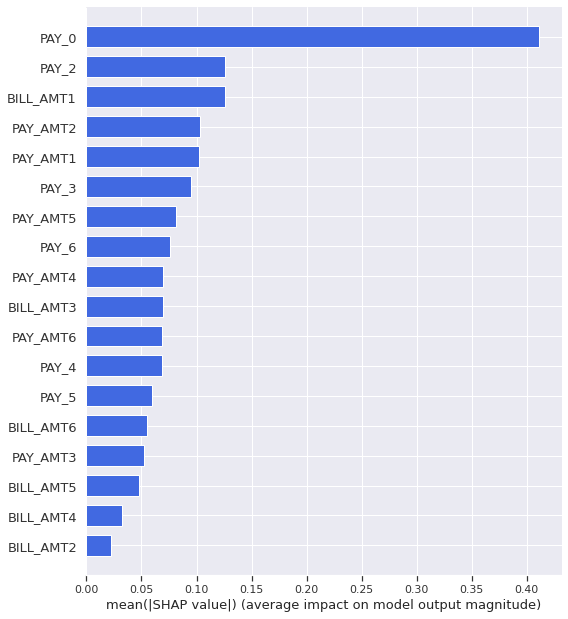

In [178]:
contributions_matrix = contributions.as_data_frame().to_numpy()
### remove last column BaseTerm 
shap_values = contributions_matrix[:,:-1]
shap.summary_plot(shap_values, X, plot_type='bar', color='royalblue')

### Conduct residual analysis to debug model

In [179]:
model.predict(test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict,p0,p1
0,0.870083,0.129917
0,0.8743,0.1257
0,0.86487,0.13513
1,0.686275,0.313725
1,0.561482,0.438518
1,0.648574,0.351426
0,0.750001,0.249999
0,0.861421,0.138579
1,0.354349,0.645651
0,0.924326,0.0756745


In [180]:
yhat = 'p_DEFAULT_NEXT_MONTH'
## remove low risk 
preds1 = model.predict(test).drop(['p0'])
preds1.columns = [ "pred",yhat]
preds1
#### the prob that will not pay back 

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


pred,p_DEFAULT_NEXT_MONTH
0,0.129917
0,0.1257
0,0.13513
1,0.313725
1,0.438518
1,0.351426
0,0.249999
0,0.138579
1,0.645651
0,0.0756745


In [181]:
### cbind combine the prediction with the original data
test_yhat = test.cbind(preds1)
test_yhat

LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_NEXT_MONTH,pred,p_DEFAULT_NEXT_MONTH
50000,female,university,married,37,use of revolving credit (0),use of revolving credit (0),use of revolving credit (0),use of revolving credit (0),use of revolving credit (0),use of revolving credit (0),46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,0.129917
100000,female,university,single,23,use of revolving credit (0),pay duly (-1),pay duly (-1),use of revolving credit (0),use of revolving credit (0),pay duly (-1),11876,380,601,221,-159,567,380,601,0,581,1687,1542,0,0,0.1257
20000,male,high school,single,35,no consumption (-2),no consumption (-2),no consumption (-2),no consumption (-2),pay duly (-1),pay duly (-1),0,0,0,0,13007,13912,0,0,0,13007,1122,0,0,0,0.13513
50000,female,high school,divorced,23,1 month delay,2 month delay,use of revolving credit (0),use of revolving credit (0),use of revolving credit (0),use of revolving credit (0),50614,29173,28116,28771,29531,30211,0,1500,1100,1200,1300,1100,0,1,0.313725
20000,male,graduate school,single,24,use of revolving credit (0),use of revolving credit (0),2 month delay,2 month delay,2 month delay,2 month delay,15376,18010,17428,18338,17905,19104,3200,0,1500,0,1650,0,1,1,0.438518
360000,female,graduate school,married,49,1 month delay,no consumption (-2),no consumption (-2),no consumption (-2),no consumption (-2),no consumption (-2),0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.351426
120000,female,university,married,39,pay duly (-1),pay duly (-1),pay duly (-1),pay duly (-1),pay duly (-1),pay duly (-1),316,316,316,0,632,316,316,316,0,632,316,0,1,0,0.249999
50000,male,graduate school,single,26,use of revolving credit (0),use of revolving credit (0),use of revolving credit (0),use of revolving credit (0),use of revolving credit (0),use of revolving credit (0),15329,16575,17496,17907,18375,11400,1500,1500,1000,1000,1600,0,0,0,0.138579
50000,male,university,single,33,2 month delay,use of revolving credit (0),use of revolving credit (0),use of revolving credit (0),use of revolving credit (0),use of revolving credit (0),30518,29618,22102,22734,23217,23680,1718,1500,1000,1000,1000,716,1,1,0.645651
280000,male,university,married,40,use of revolving credit (0),use of revolving credit (0),use of revolving credit (0),use of revolving credit (0),use of revolving credit (0),use of revolving credit (0),186503,181328,180422,170410,173901,177413,8026,8060,6300,6400,6400,6737,0,0,0.0756745


In [182]:
test_yhat = test_yhat.as_data_frame()
test_yhat['s'] = 1
test_yhat.loc[test_yhat['DEFAULT_NEXT_MONTH'] == 0, 's'] = -1
test_yhat['r_DEFAULT_NEXT_MONTH'] = test_yhat['s'] * np.sqrt(-2*(test_yhat[y]*np.log(test_yhat[yhat]) +
                                                                 ((1 - test_yhat[y])*np.log(1 - test_yhat[yhat]))))
test_yhat = test_yhat.drop('s', axis=1)

<Figure size 1152x5760 with 0 Axes>

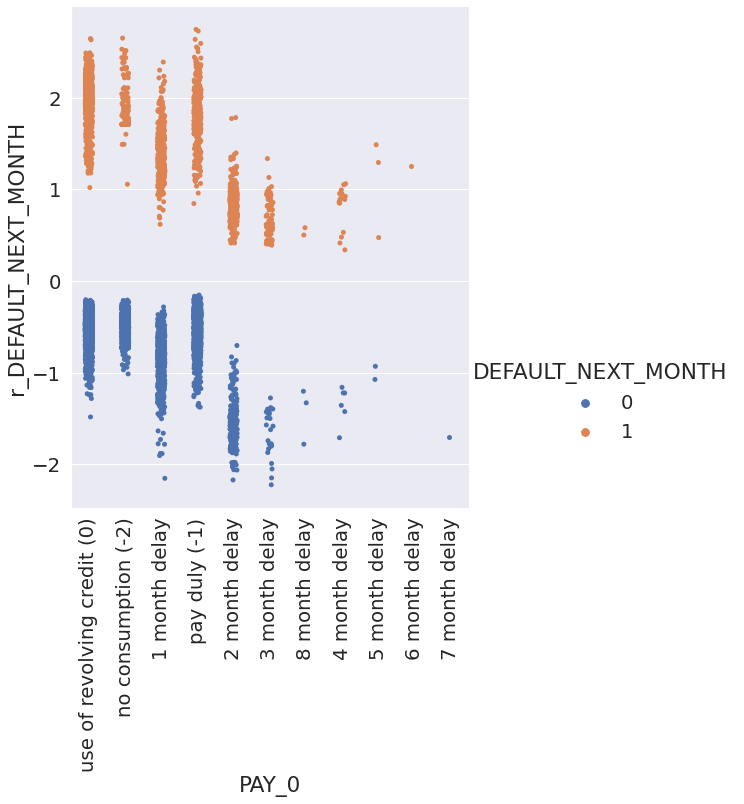

In [183]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 80))


res = sns.catplot(x='PAY_0',y='r_DEFAULT_NEXT_MONTH',hue='DEFAULT_NEXT_MONTH',data= test_yhat, height=8)

for ax in res.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()



In [184]:
def showconfusion(df, y_true, predict, class_name):
        if isinstance(df, pd.DataFrame) == 'False':
          df = df.as_data_frame()
          
        newcol = []
        y_true = df[y_true].tolist()
        predict = df[predict].tolist()
        TP, FP, FN, TN = 0, 0, 0, 0
        for i in range(len(y_true)):
            if y_true[i] == class_name:
                if y_true[i] == predict[i]:
                    TP += 1
                    newcol.append("High Risk-Predicted Correctly")

                else:
                    FN += 1
                    newcol.append("High Risk-Predicted Incorrectly")
            else:
                if y_true[i] == predict[i]:
                    TN += 1
                    newcol.append("Low Risk-Predicted Correctly")
                else:
                    FP += 1
                    newcol.append("Low Risk-Predicted Incorrectly")
        martix = np.array([[TP, FP], [FN, TN]])

        plt.figure(figsize=(10, 10))
        sns.set(font_scale=1.8)

        ax = sns.heatmap(
            martix,
            xticklabels="10",
            yticklabels="10",
            annot=True,
            square=True,
            cmap="Blues",
            fmt=".4g",
            annot_kws={"size": 20},
            cbar=False,
        )

        ax.set_xticklabels("10", size=20)
        ax.set_yticklabels("10", size=20)
        ax.set_xlabel("Actual", fontsize=20)
        ax.set_ylabel("Predicted", fontsize=20)
        # st.pyplot()

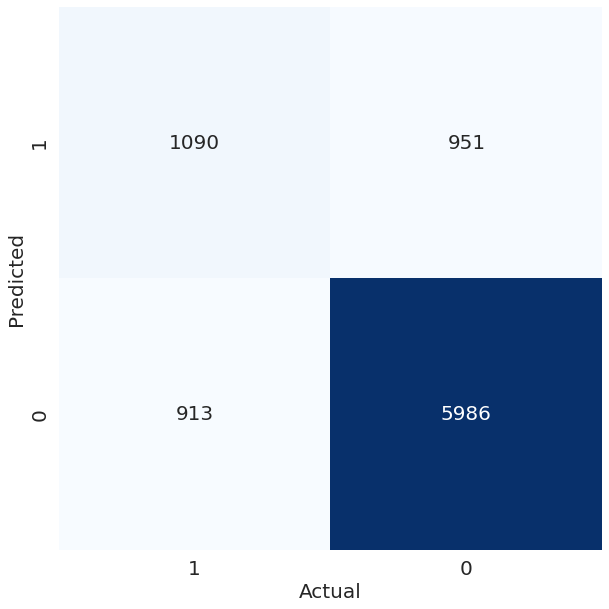

In [185]:
showconfusion(test_yhat,"DEFAULT_NEXT_MONTH" ,"pred", 1)

In [186]:
def showmodelperf(df, y_true, predict, class_name):
        if isinstance(df, pd.DataFrame) == 'False':
         df = df.as_data_frame()
        newcol = []
        y_true = df[y_true].tolist()
        predict = df[predict].tolist()
        TP, FP, FN, TN = 0, 0, 0, 0
        for i in range(len(y_true)):
            if y_true[i] == class_name:
                if y_true[i] == predict[i]:
                    TP += 1
                    newcol.append("High Risk-Predicted Correctly")

                else:
                    FN += 1
                    newcol.append("High Risk-Predicted Incorrectly")
            else:
                if y_true[i] == predict[i]:
                    TN += 1
                    newcol.append("Low Risk-Predicted Correctly")
                else:
                    FP += 1
                    newcol.append("Low Risk-Predicted Incorrectly")

        return newcol

In [187]:
test_performance= showmodelperf(test_yhat,"DEFAULT_NEXT_MONTH" ,"pred", 1)

test_yhat['Model Performance'] = test_performance

In [188]:
import plotly.express as px
def plotdisforimportantfeaturewithperf2(df,feature):

        #         color = ['red','blue','green','black','brown']

        #         fig,ax = plt.subplots(len(self.makeitfeature),sharex=True,sharey=True,figsize=(10,10))

        #         plt.suptitle('Model')
        #         plt.xlabel('Feature')
        #         plt.ylabel('Class')

        #         for i in range(len(self.makeitfeature)):
        #             X = self.X.loc[:,self.makeitfeature[i]]
        #             Y = self.y
        #             ax[i].scatter(X, Y,color= color[i],label=self.makeitfeature[i])
        #             plt.xlim([max(X), min(X)])
        #             ax[i].legend(loc=4, prop={'size': 8})
        #             ax[i].set_title('Distribution for feature %s'% self.makeitfeature[i])

        #         fig1 = px.histogram(df, x=feature, color="Diagnosis", marginal="rug")
        #         plotly_chart(fig1,use_container_width=True)

        category_orders = [
            "High Risk-Predicted Incorrectly",
            "High Risk-Predicted Correctly",
            "Low Risk-Predicted Incorrectly",
            "Low Risk-Predicted Correctly",
        ]

        colors_dict = {
            "High Risk-Predicted Incorrectly": "rgb(161,40,48)",
            "High Risk-Predicted Correctly": "rgb(240,17,0)",
            "Low Risk-Predicted Incorrectly": "rgb(143,151,121)",
            "Low Risk-Predicted Correctly": "rgb(79,121,66)",
        }
        plotly_colors = [colors_dict[c] for c in category_orders]

        fig1 = px.histogram(
            df,
            x=feature,
            color="Model Performance",
            category_orders={
                "Model Performance": [
                    "High Risk-Predicted Incorrectly",
                    "High Risk-Predicted Correctly",
                    "Low Risk-Predicted Incorrectly",
                    "Low Risk-Predicted Correctly",
                ]
            },
            color_discrete_sequence=plotly_colors,
        )


        fig1.update_traces(marker_line_width=2)
        fig1.show()

In [189]:
plotdisforimportantfeaturewithperf2(test_yhat,'PAY_0')

In [190]:
test_yhat['PAY_0'].value_counts()

use of revolving credit (0)    4386
pay duly (-1)                  1716
1 month delay                  1066
no consumption (-2)             850
2 month delay                   789
3 month delay                    98
4 month delay                    23
8 month delay                     5
5 month delay                     5
6 month delay                     1
7 month delay                     1
Name: PAY_0, dtype: int64

Summary: In this notebook, I combined different explanation methods to detect model's abnormal behavior. 